In [1]:
%pip install numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('demographic_data.csv')
df.head()

,Name,Graduation_Year,Age,Nationality,Major,GPA
0,John Smith,2024,22,USA,Computer Science,3.45
1,Maria Gonzalez,2025,21,Mexico,Psychology,3.78
2,Wei Chen,2023,23,China,Mechanical Engineering,3.12
3,Aisha Ahmed,2026,20,UAE,Business Administration,3.60
4,Liam O'Connor,2024,22,Ireland,Economics,3.02


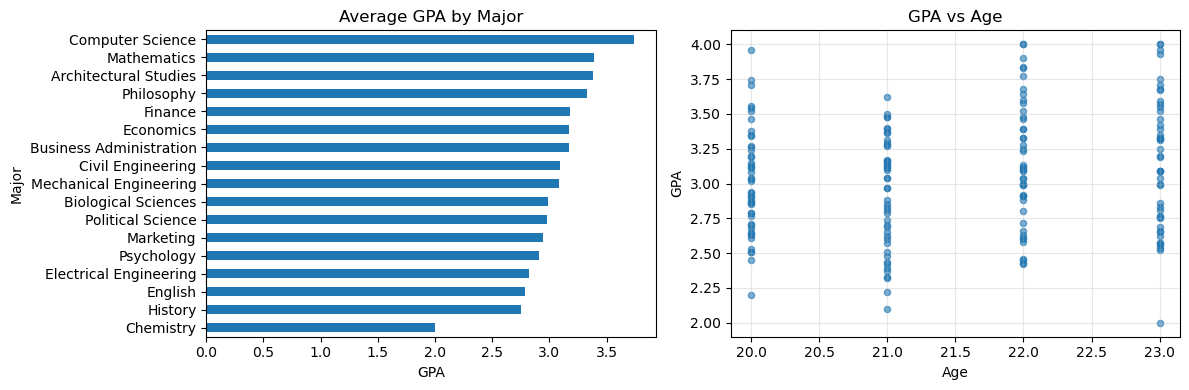

In [17]:
# Simple visualization of GPA patterns
plt.figure(figsize=(12, 4))

# Plot 1: GPA by Major
plt.subplot(1, 2, 1)
df.groupby('Major')['GPA'].mean().sort_values().plot(kind='barh')
plt.title('Average GPA by Major')
plt.xlabel('GPA')

# Plot 2: GPA vs Age scatter
plt.subplot(1, 2, 2)
plt.scatter(df['Age'], df['GPA'], alpha=0.6, s=20)
plt.xlabel('Age')
plt.ylabel('GPA')
plt.title('GPA vs Age')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [15]:
# First, let's see all the majors in our dataset
print("📚 All Majors in Dataset:")
unique_majors = df['Major'].unique()
for i, major in enumerate(sorted(unique_majors), 1):
    count = len(df[df['Major'] == major])
    print(f"{i:2d}. {major} ({count} students)")

print(f"\nTotal: {len(unique_majors)} different majors")

📚 All Majors in Dataset:
 1. Architectural Studies (1 students)
 2. Biological Sciences (17 students)
 3. Business Administration (16 students)
 4. Chemistry (1 students)
 5. Civil Engineering (3 students)
 6. Computer Science (18 students)
 7. Economics (2 students)
 8. Electrical Engineering (16 students)
 9. English (3 students)
10. Finance (17 students)
11. History (16 students)
12. Marketing (17 students)
13. Mathematics (1 students)
14. Mechanical Engineering (18 students)
15. Philosophy (1 students)
16. Political Science (18 students)
17. Psychology (17 students)

Total: 17 different majors


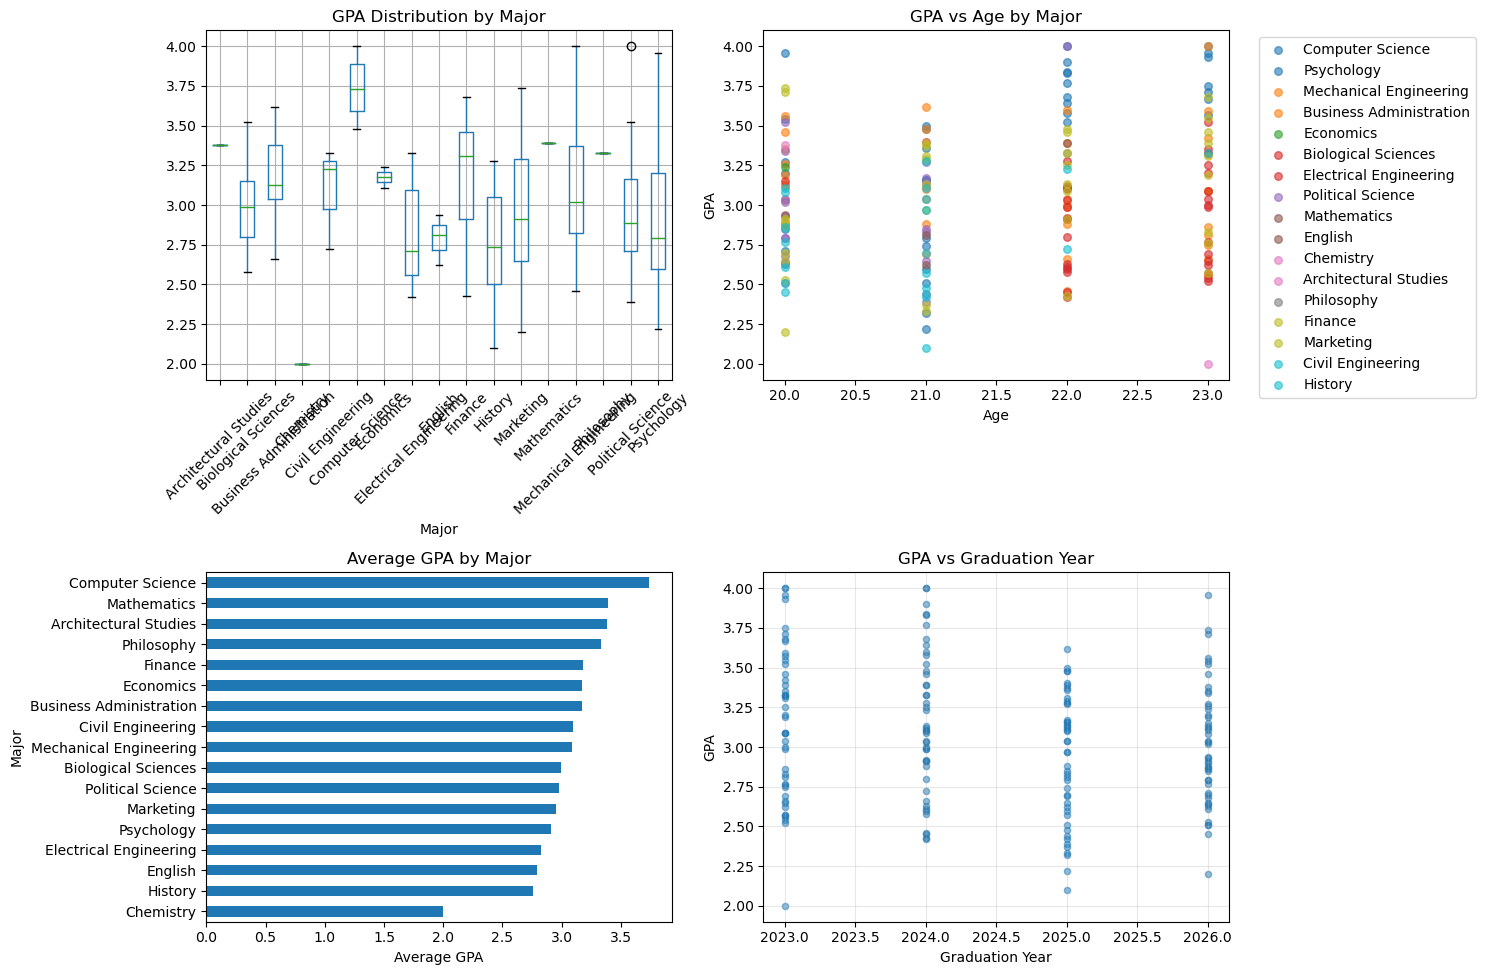


📊 Pattern Examples:

Architectural Studies:
  • Count: 1 students
  • GPA range: 3.38 - 3.38
  • Average: 3.38 ± nan

Biological Sciences:
  • Count: 17 students
  • GPA range: 2.58 - 3.52
  • Average: 2.99 ± 0.28

Business Administration:
  • Count: 16 students
  • GPA range: 2.66 - 3.62
  • Average: 3.17 ± 0.28

Chemistry:
  • Count: 1 students
  • GPA range: 2.00 - 2.00
  • Average: 2.00 ± nan

Civil Engineering:
  • Count: 3 students
  • GPA range: 2.72 - 3.33
  • Average: 3.09 ± 0.33


In [18]:
# Visualize the new GPA patterns
plt.figure(figsize=(15, 10))

# Plot 1: GPA distribution by major (box plot)
plt.subplot(2, 2, 1)
df.boxplot(column='GPA', by='Major', ax=plt.gca(), rot=45)
plt.title('GPA Distribution by Major')
plt.suptitle('')  # Remove default title

# Plot 2: GPA vs Age colored by major
plt.subplot(2, 2, 2)
majors = df['Major'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(majors)))
for major, color in zip(majors, colors):
    major_data = df[df['Major'] == major]
    plt.scatter(major_data['Age'], major_data['GPA'], 
               label=major, alpha=0.6, s=30, color=color)
plt.xlabel('Age')
plt.ylabel('GPA')
plt.title('GPA vs Age by Major')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Average GPA by major (bar chart)
plt.subplot(2, 2, 3)
avg_gpa = df.groupby('Major')['GPA'].mean().sort_values(ascending=True)
avg_gpa.plot(kind='barh')
plt.title('Average GPA by Major')
plt.xlabel('Average GPA')

# Plot 4: GPA vs Graduation Year
plt.subplot(2, 2, 4)
plt.scatter(df['Graduation_Year'], df['GPA'], alpha=0.5, s=20)
plt.xlabel('Graduation Year')
plt.ylabel('GPA')
plt.title('GPA vs Graduation Year')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show some examples of the patterns
print("\n📊 Pattern Examples:")
for major in sorted(df['Major'].unique())[:5]:  # Show first 5 majors
    major_data = df[df['Major'] == major]
    print(f"\n{major}:")
    print(f"  • Count: {len(major_data)} students")
    print(f"  • GPA range: {major_data['GPA'].min():.2f} - {major_data['GPA'].max():.2f}")
    print(f"  • Average: {major_data['GPA'].mean():.2f} ± {major_data['GPA'].std():.2f}")